In [4]:
from typing import List, Any
import main
import os
from matplotlib import pyplot as plt

def draw_roc(x, y):
    plt.plot(x, y)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()


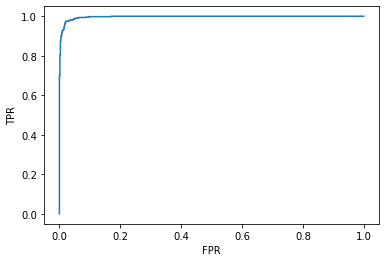

In [5]:
grams_sets = []
for i in range(1, 11):
    path = "../data/part" + str(i)
    part_set_of_grams = [main.made_n_gram(path, name, 2)
                            for name in os.listdir(path=path)]
    grams_sets.append(part_set_of_grams)
data_predict = []
m_zero, m_one = 0, 0
for i in range(10):
    model = main.BayesClassifier(0.001, [1, 1])
    train_data = []
    for j in range(10):
        if j != i:
            train_data = train_data + grams_sets[j]
    test_data = grams_sets[i]
    model.fit(train_data)
    predicted = model.binary_predict(test_data)
    for k in range(len(test_data)):
        _, y = test_data[k]
        if y == 1:
            m_one += 1
        else:
            m_zero += 1
        data_predict.append((predicted[k], y))
data_predict.sort()
data_predict.reverse()
x, y = [0], [0]
for pred, clazz in data_predict:
    if clazz == 0:
        x.append(x[-1] + 1/m_zero)
        y.append(y[-1])
    else:
        x.append(x[-1])
        y.append(y[-1] + 1/m_one)
draw_roc(x, y)